<a href="https://colab.research.google.com/github/arnavwinner/ML_Project/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from google.colab import files

# Use the 'files.upload()' function to upload your dataset
uploaded = files.upload()

# Provide the file path to the uploaded dataset
file_path = '/content/' + list(uploaded.keys())[0]

# You can verify the file is uploaded using the following line
print("Uploaded file:", file_path)


Saving data_set_train_facenet (2).zip to data_set_train_facenet (2) (1).zip
Uploaded file: /content/data_set_train_facenet (2) (1).zip


## Extraction of Dataset 

In [32]:
import zipfile

# Specify the path to the uploaded ZIP file
zip_file_path = '/content/' + list(uploaded.keys())[0]

# Specify the directory where you want to extract the contents
extracted_dir_path = '/content/my_dataset2/'

# Create the target directory if it doesn't exist
import os
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the ZIP file to the target directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_dir_path)
print("Extracted files:", extracted_files)

Extracted files: ['__MACOSX', 'test_final', 'data_set_train_facenet']


## Preprosessing


In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

# Define parameters for preprocessing
image_size = (224, 224)  # Set the desired image size
batch_size = 32  # Set your batch size

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    shear_range=0.2,  # Apply shear transformation
    zoom_range=0.2,  # Randomly zoom in/out
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in empty areas with the nearest pixel value
)

# Load and preprocess the dataset
train_data = datagen.flow_from_directory(
    '/content/my_dataset2/data_set_train_facenet/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Adjust as needed (binary, sparse, etc.)
)

# (Optional) Save the data preprocessing settings for later use
datagen_config = {
    'rescale': 1.0 / 255.0,
    'rotation_range': 20,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'shear_range': 0.2,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'fill_mode': 'nearest'
}

# with open('/kaggle/working/datagen_config.json', 'w') as f:
#     json.dump(datagen_config, f)

# (Optional) Save the class labels for later use
# class_labels = list(train_data.class_indices.keys())
# with open('/kaggle/working/class_labels.txt', 'w') as f:
#     f.write('\n'.join(class_labels))

Found 86 images belonging to 14 classes.


In [34]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the dataset directory
dataset_dir = '/content/my_dataset2/data_set_train_facenet/train'

# List the available dog breed classes
dog_breeds = [breed for breed in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, breed))]

# Count the number of images for each breed
breed_counts = {breed: len(os.listdir(os.path.join(dataset_dir, breed))) for breed in dog_breeds}

# Display the number of images for each breed
print("Number of images for each class:")
for breed, count in breed_counts.items():
    print(f"{breed}: {count} images")

# Choose a sample image from one of the breeds for visualization


Number of images for each class:
Aditya_Tiwari: 6 images
Vinayak_Kesarwani: 7 images
Kunal_Singla: 6 images
Lalit_gaur: 6 images
Omm_Prakash_Sahoo: 7 images
Arnav_Gautam: 6 images
Aditya_Singh: 6 images
Karan_Khumbar: 7 images
Aditya_Dubey: 7 images
Abhishek_Kumar: 8 images
Satyam_Sangwan: 7 images
Chirovolu_Nikhil: 7 images
J_V_Aditya: 7 images
Dhruv_Saini: 6 images


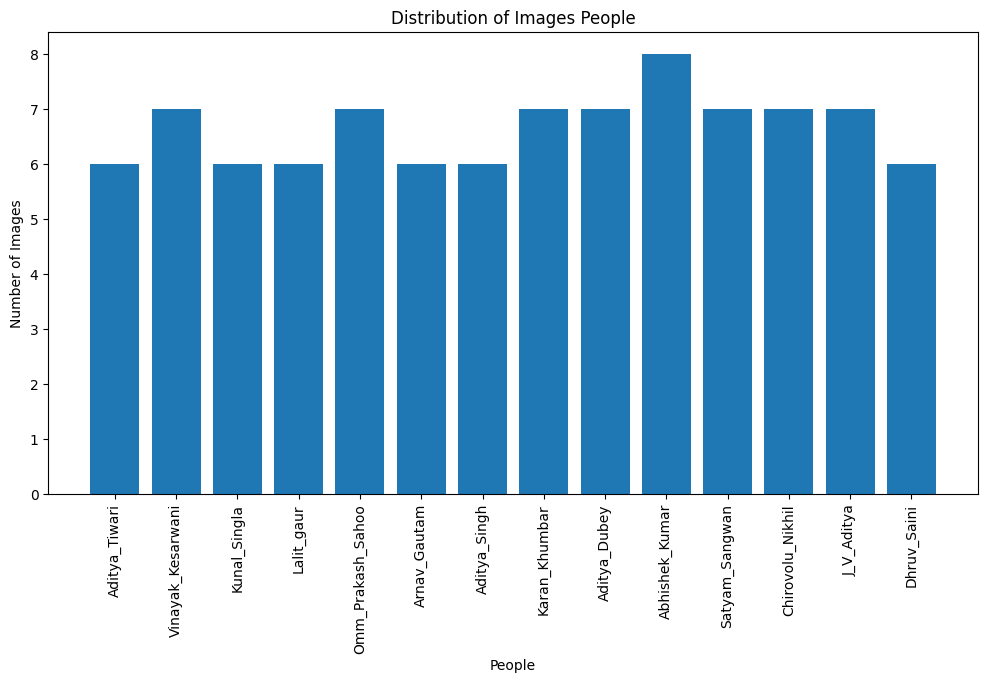

In [35]:
import matplotlib.pyplot as plt

# Count the number of images for each breed
people_counts = {breed: len(os.listdir(os.path.join(dataset_dir, breed))) for breed in dog_breeds}

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(people_counts.keys(), people_counts.values())
plt.xlabel('People')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.title('Distribution of Images People')
plt.show()

## Listing Names

In [36]:
import os
import random
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
people = list(people_counts.keys())
print(people)

['Aditya_Tiwari', 'Vinayak_Kesarwani', 'Kunal_Singla', 'Lalit_gaur', 'Omm_Prakash_Sahoo', 'Arnav_Gautam', 'Aditya_Singh', 'Karan_Khumbar', 'Aditya_Dubey', 'Abhishek_Kumar', 'Satyam_Sangwan', 'Chirovolu_Nikhil', 'J_V_Aditya', 'Dhruv_Saini']


## Collecting X_train, y_train, X_test, y_test, X_val and y_val

In [38]:
import random
import cv2
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
validtest = ['Aditya_Tiwari',"Abhishek_Kumar","Arnav_Gautam"]
# Initialize one-hot encoder and label encoder
onehot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

def collectdata(directory, num_samples_per_class,people):
    X_portion = []
    y_portion = []

    for label in people:
        label_dir = os.path.join(directory, label)
        image_files = [f for f in os.listdir(label_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

        if len(image_files) < num_samples_per_class:
            num_samples_per_class = len(image_files)

        selected_files = random.sample(image_files, num_samples_per_class)

        for filename in selected_files:
            img_path = os.path.join(label_dir, filename)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img, (224, 224))
                X_portion.append(img)
                y_portion.append(label)

    X_portion = np.array(X_portion) / 255
    y_portion = label_encoder.fit_transform(y_portion)
    y_portion = onehot_encoder.fit_transform(y_portion.reshape(-1, 1))

    return X_portion, y_portion

# Example usage:
X_train, y_train = collectdata('/content/my_dataset2/data_set_train_facenet/data_set_train_facenet/train', 6,people)
X_val, y_val = collectdata('/content/my_dataset2/data_set_train_facenet/data_set_train_facenet/val', 2,people)
X_test,y_test = collectdata('/content/my_dataset2/data_set_train_facenet/data_set_train_facenet/test', 3,people)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(84, 224, 224, 3) (84, 14)
(28, 224, 224, 3) (28, 14)
(42, 224, 224, 3) (42, 14)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Applied CNN

In [45]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Define the CNN model
# model = keras.Sequential([
#     layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(96, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(96, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='softmax')
# ])

# # Compile the model with a lower learning rate
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Train the model with data augmentation
# datagen = keras.preprocessing.image.ImageDataGenerator(
#     rotation_range= 20,
#     width_shift_range= 0.2,
#     height_shift_range= 0.2,
#     shear_range=0.2,
#     zoom_range= 0.2,
#     horizontal_flip= True,
#     fill_mode= 'nearest'
# )

# datagen.fit(X_train)

# model.fit(datagen.flow(X_train, y_train, batch_size=3), epochs=10, validation_data=(X_val, y_val))

# # Evaluate the model
# loss, accuracy = model.evaluate(X_val, y_val)
# print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')




import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),  # Add dropout for regularization
    layers.Dense(14, activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

model.fit(datagen.flow(X_train, y_train, batch_size=2), epochs=20, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')


Epoch 1/20
42/42 [==============================] - 57s 355ms/step - loss: 2.6470 - accuracy: 0.0595 - val_loss: 2.6362 - val_accuracy: 0.1071
Epoch 2/20
42/42 [==============================] - 15s 346ms/step - loss: 2.6411 - accuracy: 0.0952 - val_loss: 2.6331 - val_accuracy: 0.1429
Epoch 3/20
42/42 [==============================] - 16s 384ms/step - loss: 2.6395 - accuracy: 0.0595 - val_loss: 2.6309 - val_accuracy: 0.1429
Epoch 4/20
42/42 [==============================] - 15s 363ms/step - loss: 2.6390 - accuracy: 0.0357 - val_loss: 2.6292 - val_accuracy: 0.0714
Epoch 5/20
42/42 [==============================] - 15s 350ms/step - loss: 2.6366 - accuracy: 0.0952 - val_loss: 2.6106 - val_accuracy: 0.1071
Epoch 6/20
42/42 [==============================] - 15s 360ms/step - loss: 2.6377 - accuracy: 0.0714 - val_loss: 2.5840 - val_accuracy: 0.0714
Epoch 7/20
42/42 [==============================] - 16s 373ms/step - loss: 2.6076 - accuracy: 0.1190 - val_loss: 2.4789 - val_accuracy: 0.2143

## Results

In [50]:
y_pred = model.predict(datagen.flow(X_test))

2/2 [==============================] - 2s 344ms/step


In [51]:
y_pred=onehot_encoder.inverse_transform(y_pred)
y_pred=label_encoder.inverse_transform(y_pred)
print(y_pred,t_test)

['Omm_Prakash_Sahoo' 'Chirovolu_Nikhil' 'Kunal_Singla' 'Abhishek_Kumar'
 'Abhishek_Kumar' 'Kunal_Singla' 'Aditya_Tiwari' 'Abhishek_Kumar'
 'Omm_Prakash_Sahoo' 'Kunal_Singla' 'Aditya_Singh' 'Abhishek_Kumar'
 'Arnav_Gautam' 'Arnav_Gautam' 'Dhruv_Saini' 'Kunal_Singla' 'Kunal_Singla'
 'Satyam_Sangwan' 'Arnav_Gautam' 'Omm_Prakash_Sahoo' 'Satyam_Sangwan'
 'Chirovolu_Nikhil' 'Chirovolu_Nikhil' 'Omm_Prakash_Sahoo'
 'Chirovolu_Nikhil' 'Omm_Prakash_Sahoo' 'Aditya_Tiwari' 'Chirovolu_Nikhil'
 'Karan_Khumbar' 'Abhishek_Kumar' 'Kunal_Singla' 'Satyam_Sangwan'
 'Arnav_Gautam' 'Satyam_Sangwan' 'Kunal_Singla' 'Aditya_Singh'
 'Satyam_Sangwan' 'Aditya_Singh' 'Chirovolu_Nikhil' 'Chirovolu_Nikhil'
 'Satyam_Sangwan' 'Arnav_Gautam']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
